In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
main_path = 'C:\SPT\Tiger-beetle-image-dataset-main-1\Cicindelinae'

In [4]:
os.listdir(main_path)

['Cicindelini', 'Collyridini']

In [5]:
os.listdir(main_path + "/Cicindelini")[0]

'102800.jpg'

In [6]:
test_img =  main_path + '/Cicindelini/' + os.listdir(main_path + "/Cicindelini")[0]

In [7]:
from matplotlib.image import imread

In [8]:
img = imread(test_img)

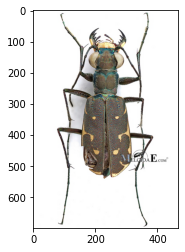

In [9]:
plt.imshow(img)

In [10]:
imread(test_img).shape

(700, 467, 3)

In [11]:
l1 = []
l2 = []
for img in os.listdir(main_path + '/Cicindelini'):
    l, d, _ = imread(main_path + '/Cicindelini' + f'/{img}').shape
    l1.append(l)
    l2.append(d)

In [12]:
l1

[700,
 533,
 400,
 1365,
 1087,
 1000,
 2042,
 473,
 505,
 700,
 1024,
 400,
 399,
 311,
 1201,
 1067,
 948,
 1479,
 1495,
 267,
 712,
 679,
 1536,
 200,
 683,
 973,
 479,
 350,
 427,
 787,
 666,
 741,
 713,
 1009,
 600,
 800,
 501,
 981,
 3156,
 841,
 3024,
 3024,
 3024,
 3024,
 3024,
 1193,
 3024,
 3024,
 3024,
 3024,
 3024,
 3024,
 3024,
 3024,
 1950,
 2121,
 2941,
 153,
 1671,
 247,
 682,
 768,
 786,
 1269,
 1641,
 1492,
 600,
 1383,
 1305,
 145,
 1408,
 1193,
 249,
 400,
 1000,
 400,
 988,
 600,
 600,
 600,
 600,
 480,
 750,
 2000,
 1114,
 1159,
 1067,
 600,
 945,
 1032,
 316,
 384,
 567,
 427,
 375,
 364,
 2319]

In [13]:
np.mean(l1)

1194.0824742268042

In [14]:
np.mean(l2)

1439.5876288659795

In [15]:
l3 = []
l4 = []
for img in os.listdir(main_path + '/Collyridini'):
    l, d, _ = imread(main_path + '/Collyridini' + f'/{img}').shape
    l3.append(l)
    l4.append(d)

In [16]:
np.mean(l3)

1236.319587628866

In [17]:
np.mean(l4)

1540.2164948453608

In [18]:
np.max(imread(main_path + '/Collyridini' + f'/{img}'))

255

In [19]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=20)
train_set = datagen.flow_from_directory(directory=main_path, class_mode='categorical', target_size=(900, 900), color_mode='grayscale', subset='training', batch_size=32)
validation_set = datagen.flow_from_directory(directory=main_path, class_mode='categorical', target_size=(900, 900), color_mode='grayscale', subset='validation', batch_size=32)

Found 156 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [43]:
# creating the model

model = Sequential()

model.add(Conv2D(8, kernel_size=(5,5), activation='relu', input_shape=(900, 900, 1)))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu', input_shape=(900, 900, 1)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu', input_shape=(900, 900, 1)))
model.add(MaxPool2D(pool_size=(5,5)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
          
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 896, 896, 8)       208       
                                                                 
 conv2d_13 (Conv2D)          (None, 892, 892, 16)      3216      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 178, 178, 16)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 174, 174, 16)      6416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 18496)            

In [45]:
call_backs = EarlyStopping(monitor='val_loss', patience=2)

In [46]:
train_set.class_indices

{'Cicindelini': 0, 'Collyridini': 1}

In [47]:
model.fit(train_set, epochs=7, validation_data=validation_set, callbacks=[call_backs])

Epoch 1/7
5/5 [==============================] - 100s 20s/step - loss: 1.9425 - accuracy: 0.5000 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 2/7
5/5 [==============================] - 101s 20s/step - loss: 0.6959 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/7
5/5 [==============================] - 98s 19s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/7
5/5 [==============================] - 101s 20s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/7
5/5 [==============================] - 97s 19s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/7
5/5 [==============================] - 93s 18s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/7
5/5 [==============================] - 101s 21s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000


In [48]:
hist = pd.DataFrame(model.history.history)

In [49]:
hist

,loss,accuracy,val_loss,val_accuracy
0,1.942493,0.5,0.699129,0.5
1,0.695908,0.5,0.693162,0.5
2,0.693216,0.5,0.693158,0.5
3,0.693156,0.5,0.693157,0.5
4,0.693157,0.5,0.693157,0.5
5,0.693155,0.5,0.693153,0.5
6,0.693188,0.5,0.693458,0.5


<AxesSubplot:>

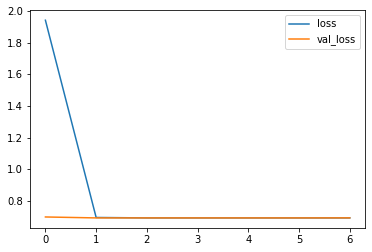

In [62]:
hist[['loss', 'val_loss']].plot()

<AxesSubplot:>

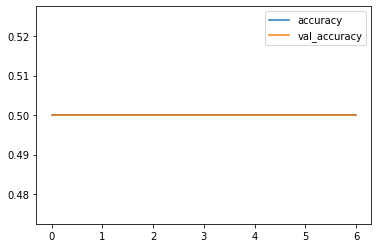

In [63]:
hist[['accuracy', 'val_accuracy']].plot()

In [82]:
pred = model.predict(validation_set)

2/2 [==============================] - 9s 481ms/step


In [99]:
predictions = pred >= 0.5

In [100]:
confusion_matrix(validation_set.classes, predictions)

array([[ 5, 14],
       [ 4, 15]], dtype=int64)

<AxesSubplot:>

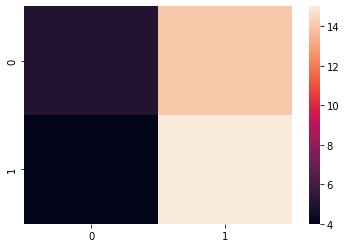

In [101]:
sns.heatmap(confusion_matrix(validation_set.classes, predictions))

In [102]:
classification_report(validation_set.classes, predictions)

'              precision    recall  f1-score   support\n\n           0       0.56      0.26      0.36        19\n           1       0.52      0.79      0.62        19\n\n    accuracy                           0.53        38\n   macro avg       0.54      0.53      0.49        38\nweighted avg       0.54      0.53      0.49        38\n'

In [43]:
model.save('SPTModelfinal.h5')